In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

filepath = "../Data_Cleaning/output_cleaned_data.csv"
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           723 non-null    float64
 1   Hours per day                 723 non-null    float64
 2   While working                 721 non-null    object 
 3   Fav genre                     723 non-null    object 
 4   BPM                           620 non-null    float64
 5   Frequency [Classical]         723 non-null    object 
 6   Frequency [Country]           723 non-null    object 
 7   Frequency [EDM]               723 non-null    object 
 8   Frequency [Folk]              723 non-null    object 
 9   Frequency [Gospel]            723 non-null    object 
 10  Frequency [Hip hop]           723 non-null    object 
 11  Frequency [Jazz]              723 non-null    object 
 12  Frequency [K pop]             723 non-null    object 
 13  Frequ

In [129]:
# Show the columns to see the column names
df.head()

,Age,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,5.0,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,3.0,Yes,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [130]:
# Print the ages to check if any missing value.
df["Age"].unique()

array([18., 61., 21., 19., 17., 16., 15., 14., 20., 26., 23., 37., 36.,
       24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43., 28., 34.,
       13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56., 59., 10.,
       12., 54., 57., 69., 72., 73., 39., 63., 58., 67., 70., 55., 48.,
       71., 74., 51., 65., 80., 50., 68., 46.])

In [131]:
# Make a new DF with the columns need it for question 2
# Are there significant differences in mental health rankings based on age groups for those who frequently listen to specific genres?
cols = ["Age", "Hours per day", "Fav genre", "Anxiety", "Depression", "Insomnia", "OCD"]

question2_df = df[cols]
question2_df.head()

,Age,Hours per day,Fav genre,Anxiety,Depression,Insomnia,OCD
0,18.0,4.0,Video game music,7.0,7.0,10.0,2.0
1,61.0,2.5,Jazz,9.0,7.0,3.0,3.0
2,18.0,4.0,R&B,7.0,2.0,5.0,9.0
3,18.0,5.0,Jazz,8.0,8.0,7.0,7.0
4,18.0,3.0,Video game music,4.0,8.0,6.0,0.0


In [132]:
# Make a copy from the DataFrame before changes in case need to use later.
question2 = question2_df.copy()

In [133]:
# Define the bin edges for age groups to create a new table
bins = [0, 20, 30, 40, 50, 60, 100]
group_names = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

In [134]:
# Create a new column in the DataFrame with age groups
question2_df['Age_Group'] = pd.cut(question2_df['Age'], bins=bins, labels=group_names)
question2_df.head()

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_10040\3863332616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question2_df['Age_Group'] = pd.cut(question2_df['Age'], bins=bins, labels=group_names)


,Age,Hours per day,Fav genre,Anxiety,Depression,Insomnia,OCD,Age_Group
0,18.0,4.0,Video game music,7.0,7.0,10.0,2.0,<20
1,61.0,2.5,Jazz,9.0,7.0,3.0,3.0,60+
2,18.0,4.0,R&B,7.0,2.0,5.0,9.0,<20
3,18.0,5.0,Jazz,8.0,8.0,7.0,7.0,<20
4,18.0,3.0,Video game music,4.0,8.0,6.0,0.0,<20


In [135]:
#  Calculate averages for age group, to create a new DataFrame.
anxiety_range_avg = round(question2_df.groupby(["Age_Group"])["Anxiety"].mean(),2)
depression_range_avg = round(question2_df.groupby(["Age_Group"])["Depression"].mean(),2)
insomnia_range_avg = round(question2_df.groupby(["Age_Group"])["Insomnia"].mean(),2)
OCD_range_avg = round(question2_df.groupby(["Age_Group"])["OCD"].mean(),2)

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_10040\3910373141.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_range_avg = round(question2_df.groupby(["Age_Group"])["Anxiety"].mean(),2)
C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_10040\3910373141.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depression_range_avg = round(question2_df.groupby(["Age_Group"])["Depression"].mean(),2)
C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_10040\3910373141.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

In [136]:
# Assembly into DataFrame (MI = Mental Illness)
MI_AGE_AVR = pd.DataFrame(
    {"Avg_Anxiety_By_Age": anxiety_range_avg,
     "Avg_Depression_By_Age": depression_range_avg,
     "Avg_Insomnia_By_Age": insomnia_range_avg,
     "Avg_OCD_By_Age": OCD_range_avg,       
    }   
)
MI_AGE_AVR

,Avg_Anxiety_By_Age,Avg_Depression_By_Age,Avg_Insomnia_By_Age,Avg_OCD_By_Age
Age_Group,,,,
<20,5.90,4.52,3.63,2.71
20-29,6.28,5.57,3.74,2.88
30-39,5.72,5.00,4.33,2.61
40-49,5.50,4.54,4.50,1.85
50-59,2.73,2.04,3.27,1.46
60+,4.89,3.61,3.50,1.22


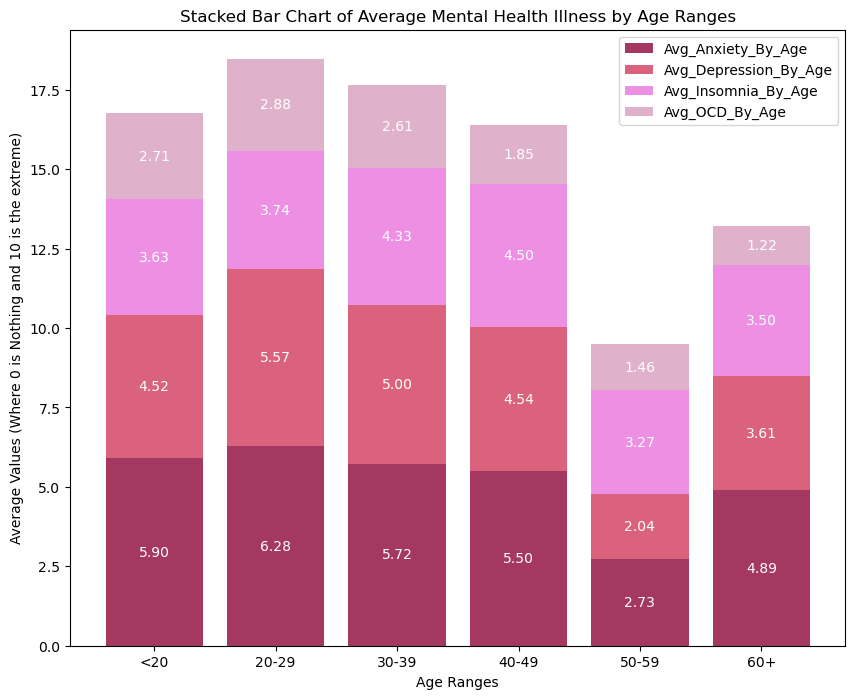

In [137]:
# Create a stacked bar plot to compare the age group with the average Mental Illness
categories = MI_AGE_AVR.index
data = MI_AGE_AVR.values.T

plt.figure(figsize=(10, 8))
bar1 = plt.bar(categories, data[0], label="Avg_Anxiety_By_Age", color="#A53860")
bar2 = plt.bar(categories, data[1], bottom=data[0], label="Avg_Depression_By_Age", color="#DA627D")
bar3 = plt.bar(categories, data[2], bottom=data[0] + data[1], label="Avg_Insomnia_By_Age", color="#ED90E3")
bar4 = plt.bar(categories, data[3], bottom=data[0] + data[1] + data[2], label="Avg_OCD_By_Age", color="#E0B1CB")

for i, bars in enumerate([bar1, bar2, bar3, bar4]):
    for bar in bars:
        height = bar.get_height()
        idx = bars.index(bar)
        if i == 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f"{height:.2f}", ha='center', va='center', color='white')
        else:
            cumulative_height = sum(data[j][idx] for j in range(i)) + height / 2
            plt.text(bar.get_x() + bar.get_width() / 2, cumulative_height, f'{height:.2f}', ha='center', va='center', color='white')

plt.xlabel("Age Ranges")
plt.ylabel("Average Values (Where 0 is Nothing and 10 is the extreme)")
plt.title("Stacked Bar Chart of Average Mental Health Illness by Age Ranges")
plt.legend()
plt.show()


In [138]:
# Prepare the data to create scatter plot to show the relation between age and mental health problem with the Music Genre
# a_mh_mg = Age, Mental health, Music Genre
a_mh_mg = question2

# Extract data from the columns
age = a_mh_mg['Age']
music_genre = a_mh_mg["Fav genre"]
anxiety = a_mh_mg["Anxiety"]
depression = a_mh_mg["Depression"]
insomnia = a_mh_mg["Insomnia"]
ocd = a_mh_mg["OCD"]

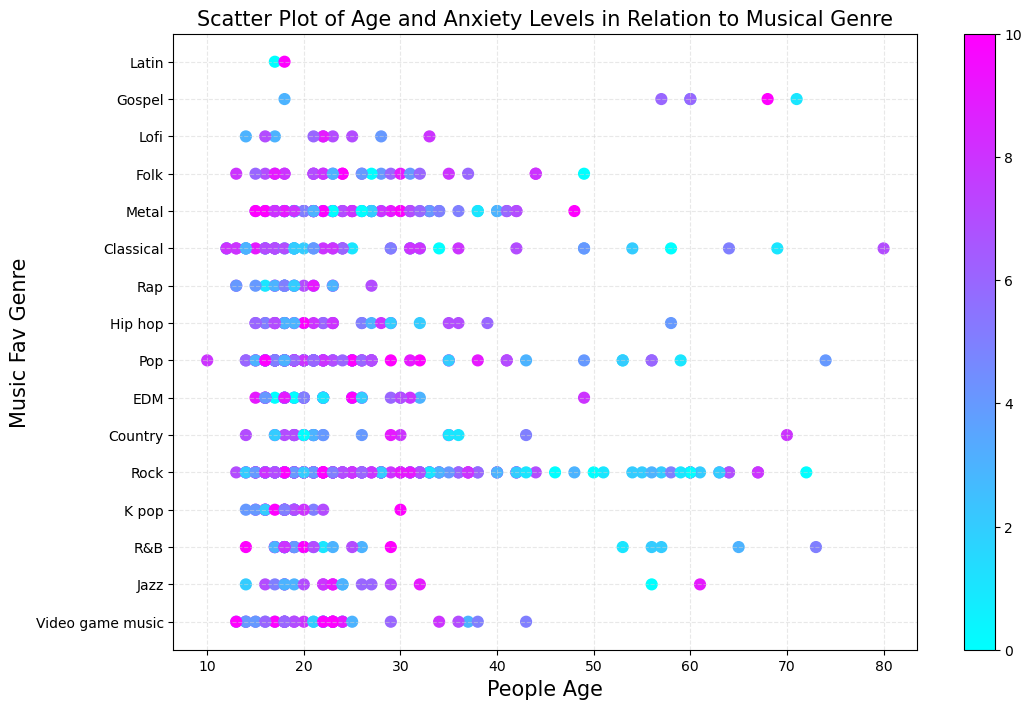

In [139]:
# Create the scatter plot to show the relation between Age and Anxiety levels in relation to the music genre
plt.figure(figsize=(12, 8))
plt.scatter(age, music_genre, s=60, c=anxiety, cmap='cool', marker='o')

plt.xlabel("People Age", fontsize=15)
plt.ylabel("Music Fav Genre", fontsize=15)
plt.title("Scatter Plot of Age and Anxiety Levels in Relation to Musical Genre", fontsize=15)
plt.colorbar()
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.show()

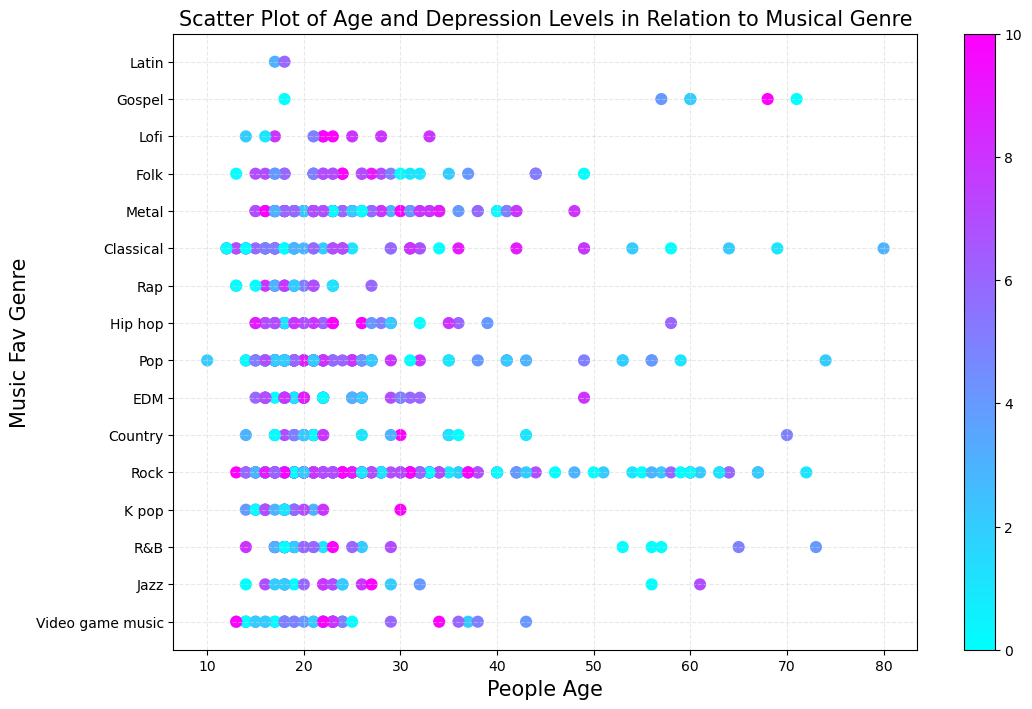

In [140]:
# Create the scatter plot to show the relation between Age and Depression levels in relation to the music genre
plt.figure(figsize=(12, 8))
plt.scatter(age, music_genre, s=60, c=depression, cmap='cool', marker='o')

plt.xlabel("People Age", fontsize=15)
plt.ylabel("Music Fav Genre", fontsize=15)
plt.title("Scatter Plot of Age and Depression Levels in Relation to Musical Genre", fontsize=15)
plt.colorbar()
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.show()

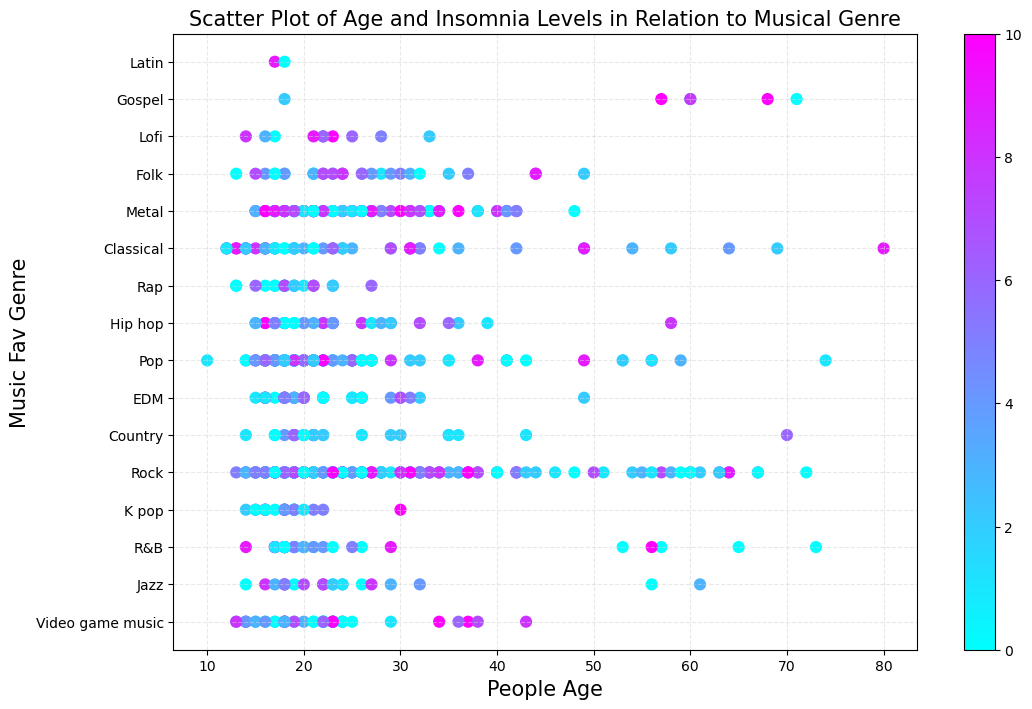

In [141]:
# Create the scatter plot to show the relation between Age and Insomnia levels in relation to the music genre
plt.figure(figsize=(12, 8))
plt.scatter(age, music_genre, s=60, c=insomnia, cmap='cool', marker='o')

plt.xlabel("People Age", fontsize=15)
plt.ylabel("Music Fav Genre", fontsize=15)
plt.title("Scatter Plot of Age and Insomnia Levels in Relation to Musical Genre", fontsize=15)
plt.colorbar()
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.show()

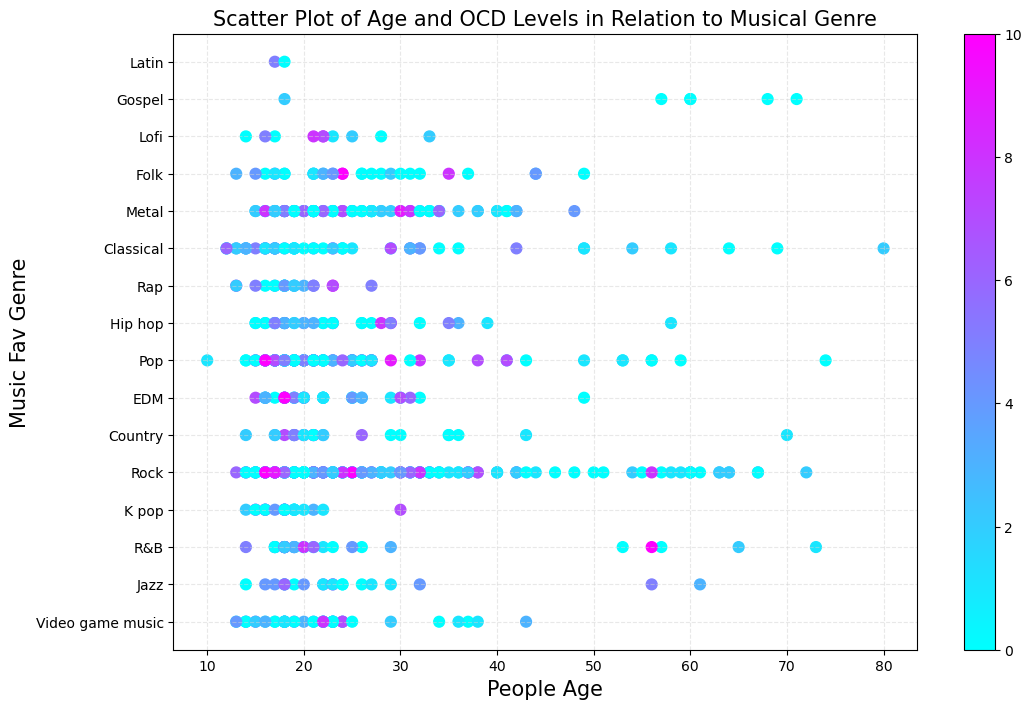

In [142]:
# Create the scatter plot to show the relation between Age and OCD levels in relation to the music genre
plt.figure(figsize=(12, 8))
plt.scatter(age, music_genre, s=60, c=ocd, cmap='cool', marker='o')

plt.xlabel("People Age", fontsize=15)
plt.ylabel("Music Fav Genre", fontsize=15)
plt.title("Scatter Plot of Age and OCD Levels in Relation to Musical Genre", fontsize=15)
plt.colorbar()
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.show()

In [143]:
# Get the average of the four Illness per person and add it to the DataFrame
illness = ["Anxiety", "Depression", "Insomnia", "OCD"]

row_avg = question2[illness].mean(axis=1)
question2["Illness_Average"] = row_avg

question2

,Age,Hours per day,Fav genre,Anxiety,Depression,Insomnia,OCD,Illness_Average
0,18.0,4.0,Video game music,7.0,7.0,10.0,2.0,6.50
1,61.0,2.5,Jazz,9.0,7.0,3.0,3.0,5.50
2,18.0,4.0,R&B,7.0,2.0,5.0,9.0,5.75
3,18.0,5.0,Jazz,8.0,8.0,7.0,7.0,7.50
4,18.0,3.0,Video game music,4.0,8.0,6.0,0.0,4.50
...,...,...,...,...,...,...,...,...
718,17.0,2.0,Rock,7.0,6.0,0.0,9.0,5.50
719,18.0,1.0,Pop,3.0,2.0,2.0,5.0,3.00
720,19.0,6.0,Rap,2.0,2.0,2.0,2.0,2.00
721,19.0,5.0,Classical,2.0,3.0,2.0,1.0,2.00


In [144]:
# Get the average of the 4 Illness
illness = ["Anxiety", "Depression", "Insomnia", "OCD"]
average_illness = question2[illness].mean()
average_illness

Anxiety       5.855463
Depression    4.813278
Insomnia      3.753112
OCD           2.643154
dtype: float64

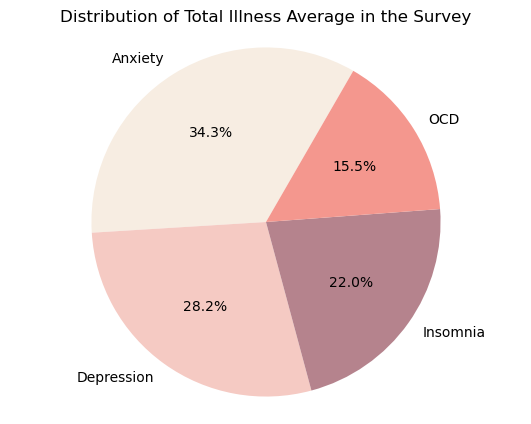

In [145]:
# Create a pie plot showing the distribution of the mental health problem with the average illness
# Get the data
sizes = [5.85, 4.81, 3.75, 2.64]
labels = ["Anxiety", "Depression", "Insomnia", "OCD"]
colors = ["#f7ede2", "#f5cac3", "#b5838d", "#f4978e"] 

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, pctdistance=0.60, colors=colors)
ax.axis('equal')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Add the title and show the plot
plt.title("Distribution of Total Illness Average in the Survey")
fig = plt.gcf()

In [146]:
# Get the average of the for the two most communt Illness per person and add it to the DataFrame
illness = ["Anxiety", "Depression"]

mc_avg = question2[illness].mean(axis=1)
question2["Most_Common_Avg"] = mc_avg

question2.head()

,Age,Hours per day,Fav genre,Anxiety,Depression,Insomnia,OCD,Illness_Average,Most_Common_Avg
0,18.0,4.0,Video game music,7.0,7.0,10.0,2.0,6.50,7.0
1,61.0,2.5,Jazz,9.0,7.0,3.0,3.0,5.50,8.0
2,18.0,4.0,R&B,7.0,2.0,5.0,9.0,5.75,4.5
3,18.0,5.0,Jazz,8.0,8.0,7.0,7.0,7.50,8.0
4,18.0,3.0,Video game music,4.0,8.0,6.0,0.0,4.50,6.0


In [147]:
# Define a function to create Linear Regression plots

def doRegression(x_values, y_values, x_title, y_title, annotation_position):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(10, 8))
    
    #Plot values
    plt.scatter(x_values, y_values, color="#00b4d8", s=30)
    plt.plot(x_values, regress_values, "#B5838D")
    
    plt.xlabel(x_title, fontsize=15)
    plt.ylabel(y_title, fontsize=15)
    plt.title(f"{x_title} vs {y_title}", fontsize=15)
    
    plt.annotate(line_eq, annotation_position, fontsize=15, color="#B5838D", fontweight="bold" )
    
    print(f'The r-value is {rvalue}')
    #plt.savefig(f"{x_title} vs {y_title}")
    plt.show()

The r-value is -0.08519510790863143


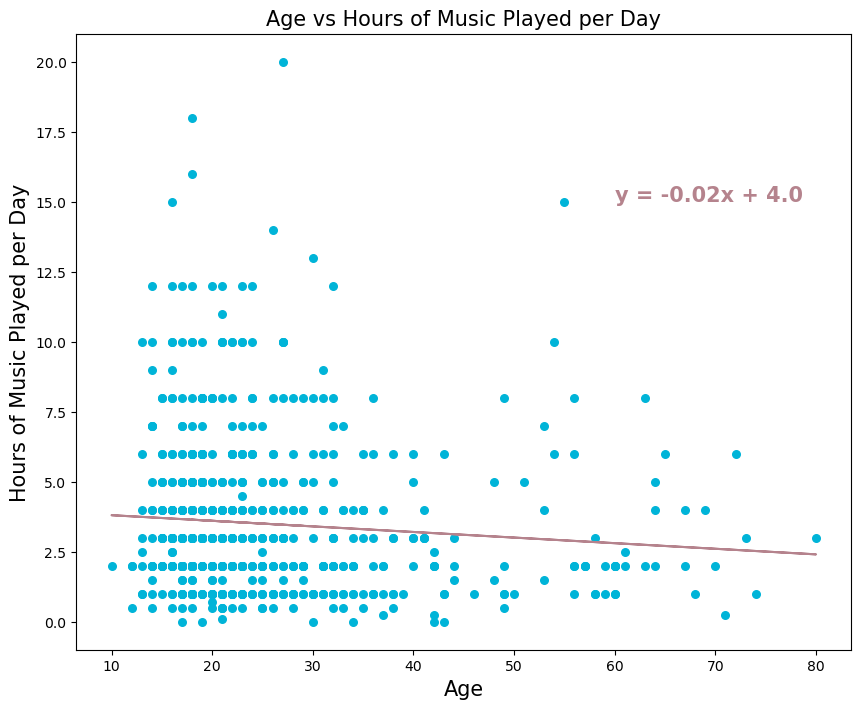

In [148]:
# Linear regression on 
x_values = question2["Age"]
y_values = question2["Hours per day"]
doRegression(x_values, y_values, "Age", "Hours of Music Played per Day", (60,15))

The r-value is -0.15733981033694291


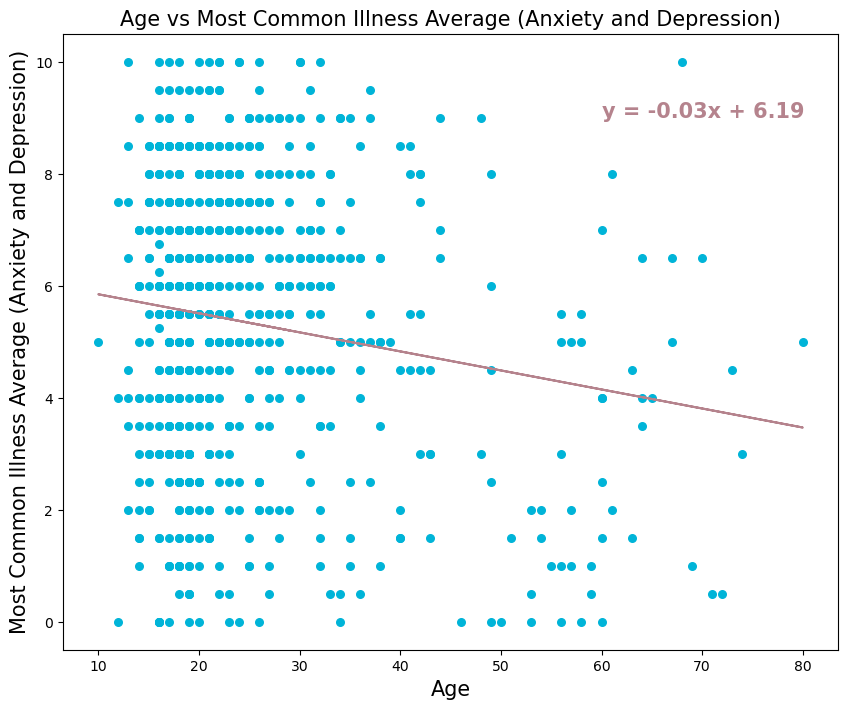

In [149]:
# Linear regression on Northern Hemisphere
x_values = question2["Age"]
y_values = question2["Most_Common_Avg"]
doRegression(x_values, y_values, "Age", "Most Common Illness Average (Anxiety and Depression)", (60,9))

In [150]:
# Get the count for how many people is on the Age_Group
question2_df["Age_Group"].value_counts()

Age_Group
<20      333
20-29    244
30-39     76
40-49     26
50-59     26
60+       18
Name: count, dtype: int64

In [151]:
# With the Age_Group information (value_counts), get the average of people for each group age 
age_groups = {"<20": 333, "20-29": 244, "30-39": 75, "40-49": 26, "50-59":26, "60+":18}
age_total = sum(age_groups.values())
age_perc = {key: (value / age_total) * 100 for key, value in age_groups.items()}
age_perc

{'<20': 46.121883656509695,
 '20-29': 33.795013850415515,
 '30-39': 10.38781163434903,
 '40-49': 3.6011080332409975,
 '50-59': 3.6011080332409975,
 '60+': 2.4930747922437675}

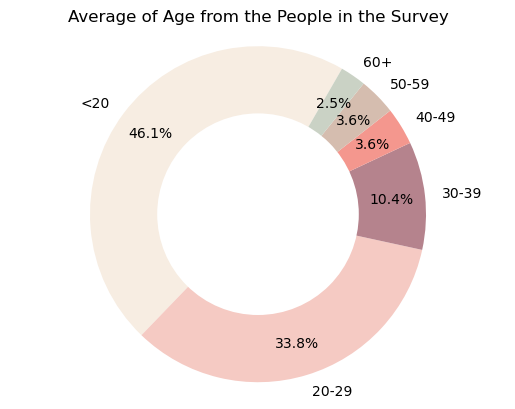

In [152]:
# Create a Donut chart showing the distribution of the average age people on the survey
# Get the data
sizes = [46.12, 33.79, 10.38, 3.60, 3.60, 2.49]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
colors = ["#f7ede2", "#f5cac3", "#b5838d", "#f4978e", "#d5bdaf", "#cad2c5"]

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, pctdistance=0.80, colors=colors)
ax.axis('equal')

# Add the Title
plt.title("Average of Age from the People in the Survey")

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [153]:
# Get the count for Fav genre, how many people like each genre
question2_df["Fav genre"].value_counts()

Fav genre
Rock                185
Pop                 114
Metal                88
Classical            53
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              25
K pop                23
Jazz                 20
Rap                  20
Lofi                 10
Gospel                6
Latin                 2
Name: count, dtype: int64

In [154]:
# With the Fav genre information (value_counts), get the average for fav genre
fav_genre_groups = {"Rock": 185, "Pop": 114, "Metal": 88, "Classical": 53, "Video game music":43, "EDM":36, "R&B":35, "Hip hop":34, "Folk":29, "Country":25, 
              "K pop":23, "Jazz":20, "Rap":20, "Lofi":10, "Gospel":6, "Latin":2}
fav_genre_total = sum(fav_genre_groups.values())
fav_genre_perc = {key: (value / fav_genre_total) * 100 for key, value in fav_genre_groups.items()}
fav_genre_perc

{'Rock': 25.587828492392806,
 'Pop': 15.767634854771783,
 'Metal': 12.171507607192254,
 'Classical': 7.330567081604427,
 'Video game music': 5.94744121715076,
 'EDM': 4.979253112033195,
 'R&B': 4.840940525587829,
 'Hip hop': 4.702627939142462,
 'Folk': 4.011065006915629,
 'Country': 3.4578146611341634,
 'K pop': 3.18118948824343,
 'Jazz': 2.7662517289073305,
 'Rap': 2.7662517289073305,
 'Lofi': 1.3831258644536653,
 'Gospel': 0.8298755186721992,
 'Latin': 0.2766251728907331}

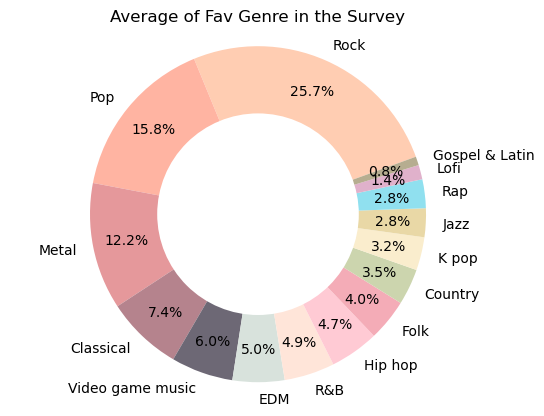

In [155]:
# Create a Donut chart showing the distribution of the average fav genre on the survey
# Get the data
sizes = [25.58, 15.76, 12.17, 7.33, 5.95, 4.98, 4.84, 4.70, 4.01, 3.46, 3.18, 2.76, 2.76, 1.38, 0.83]
labels = ["Rock", "Pop", "Metal", "Classical", "Video game music", "EDM", "R&B", "Hip hop", "Folk", "Country", "K pop", "Jazz", "Rap", "Lofi", 
          "Gospel & Latin"]
colors = ["#ffcdb2", "#ffb4a2", "#e5989b", "#b5838d", "#6d6875", "#d8e2dc", "#ffe5d9", "#ffcad4", "#f4acb7", "#ccd5ae", "#faedcd", "#e9d8a6", "#90e0ef",
         "#e0b1cb", "#b6ad90", "#d5bdaf"]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=20, pctdistance=0.80, colors=colors)
ax.axis('equal')

# Add the Title
plt.title("Average of Fav Genre in the Survey")

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Note: Gospel & Latin was displayed together because the numbers are relatively low and we can't see it